In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd

In [13]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import MetaData, Table

In [15]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# Use table_name() to disply SQLite tables
print(engine.table_names())

['measurement', 'station']


In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Explore Sqlite tables using MetaData(),<br>Output object string for each table with repr(),<br>Display 5 recs for each with query  

In [21]:
# use MetaData() to load table metadata 
metadata = MetaData()
measureTbl = Table('measurement', metadata, autoload=True, autoload_with = engine)
stationTbl = Table('station', metadata, autoload=True, autoload_with = engine)

In [22]:
# use repr() to display full object string for table measureTbl
print(repr(measureTbl))

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)


In [23]:
# use repr() to display full object string for table stationTbl
print(repr(stationTbl))

Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)


In [24]:
# View measurement table data w/ compare to Sqlite browse -- OK
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [25]:
# View sation data w/ compare to Sqlite browse -- OK
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


### Retrieve 12 Months of Measurement table data for Precipitation:
- Session.query contains filter for date range.
- Create dataframe with retrieved data
- Return 10 recs for check

In [27]:
# Use session.query to retrieve date and prcp column data from Measurement for 12 month date range -- obsv dates should be 2230
getPrcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date <= '2017-08-23').\
                        filter(Measurement.date >= '2016-08-23').all()

# Create DF with retrieved columns, set order to date
getPrcpDF = pd.DataFrame(data=getPrcp, columns=["date", "prcp"])
getPrcpDF.sort_values('date')

# Check two ways -- toggle these: .count() and 10 day .head(10)
# getPrcpDF.count()
getPrcpDF.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


### Plot Line Chart of Retrieved Data
(Note: this chart plots Prec. for multiple stations per day)

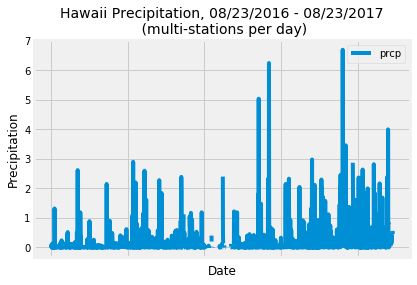

In [28]:
# plot prcp x date
getPrcpDF.plot(x='date', y='prcp')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precipitation', fontsize=12)
plt.title('Hawaii Precipitation, 08/23/2016 - 08/23/2017\n (multi-stations per day)', fontsize=14)
plt.show()


### Analyze getPrcpDF DataFrame
- Get summary statistics with .describe()
- Get count of distinct stations (achieved with two different methods)
- Get distinct station activity counts and list, descending order
- Identify and return most active station
- Display min, max and avg Temp. Observations data for most active station

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
#  via Describe()
getPrcpDF.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# Get record count of distinct station in stations -- meth1 is pass SQL
engine.execute('SELECT count(station) as Stations from station').fetchall()

[(9,)]

In [31]:
# Get record count of distinct station in stations -- meth2 retrieve and create DF
stationList = session.query(Station.id, Station.station, Station.name,\
                            Station.latitude, Station.longitude,\
                            Station.elevation).all()
stationDF = pd.DataFrame(data=stationList, columns = ['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
len(stationDF)

9

In [32]:
# from instructions for ref: func.min, func.max, func.avg, and func.count
# Most active stations -- Get record count (observation date) for distinct station w/ count, group_by and order_by (desc)
stationCnt = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
stationCnt

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# List station with highest number of observations by (iter first list item) - set most active station (maStation) for use below
maStation = next(iter(stationCnt))
maStation

('USC00519281', 2772)

In [34]:
# Using the most active station from the previous query, calculate the lowest, highest
# and average temps recorded
maStationSums = session.query(func.min(Measurement.tobs),\
                func.max(Measurement.tobs),\
                func.avg(Measurement.tobs)).\
                filter(Measurement.station=='USC00519281').all()

next(iter(maStationSums))


(54.0, 85.0, 71.66378066378067)

### Retrieve 12 months of Temp. Observation data for most active station
- Retrieve data with date and station filtering
- Create DF with retrieved data
- Plot histogram of temp. observations, applying 5 bins for temp.

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
getTobs = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                filter(Measurement.date <= '2017-08-23').\
                filter(Measurement.date >= '2016-08-23').\
                filter(Measurement.station=='USC00519281').all()
# create DF using query results
tobsDF = pd.DataFrame(data=getTobs, columns=['station','date','tobs'])
tobsDF.count()

station    352
date       352
tobs       352
dtype: int64

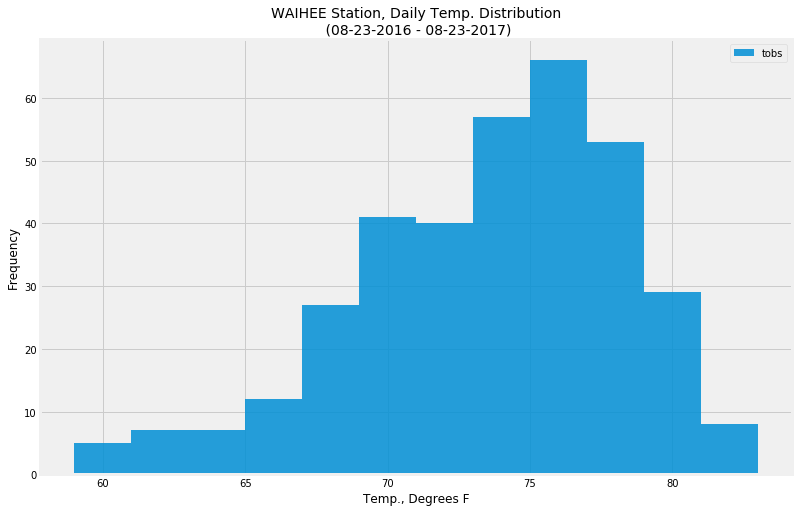

In [36]:
# Plot 12 month tobs data in histogram using 12 bins
xdata = tobsDF['tobs']
xbins = 12
plt.figure(figsize=[12.0,8.0])
plt.hist(xdata, xbins, label = 'tobs', alpha = .85)
plt.title('WAIHEE Station, Daily Temp. Distribution\n (08-23-2016 - 08-23-2017)', fontsize=14)
plt.xlabel('Temp., Degrees F', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(frameon=True)


In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    selTobs= [Measurement.date, func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)]
    return session.query(seltobs).\
        group_by(Measurement.date).\
        #filter(Measurement.date >=start_date).\
       # filter(Measurement.date <=end_date).all()

  

SyntaxError: invalid syntax (<ipython-input-9-9690e30a9a32>, line 5)